# Datasets

Phase 1 and 2 were both utlizing dataset collected from Kaggle:

Customer Purchasing behaviour: https://www.kaggle.com/datasets/hanaksoy/customer-purchasing-behaviors

Customer Shopping Trends Datset: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Update the path to the location of your file
path = "your_path_location_to_customer_purchasing_behaviour"
path2 ="your_path_location_to_customer_shopping_trends"

# Phase 1 - Initial visualizations


**Scatter Plot**

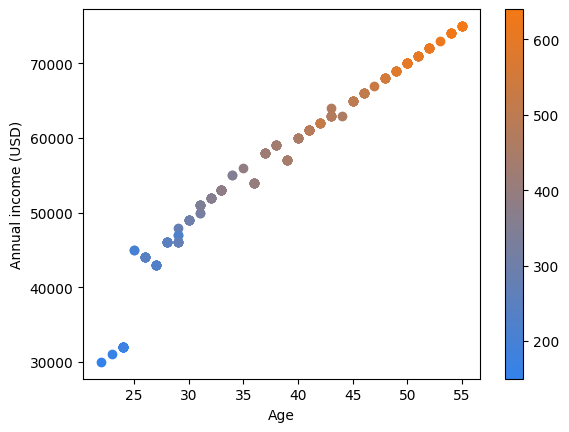

In [ ]:
from numpy import *
from matplotlib.pyplot import *

data = genfromtxt(path, names=True, delimiter=',', dtype=[float, float, float, float, float, str, float])
age = data['age']
ain = data["annual_income"]
puam = data["purchase_amount"]
c1 = (0.20, 0.51, 0.92)
c2 = (0.96, 0.47, 0.08)
norm = Normalize(min(puam), max(puam))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [c1, c2])
for i in range(len(age)) :
	r = puam[i] / max(puam)
	col = [c1[i]*(1-r)+c2[i]*r for i in range(3)]
	scatter(age[i], ain[i], c=puam[i], cmap=cmap, norm=norm)
xlabel("Age")
ylabel("Annual income (USD)")
colorbar()
show()

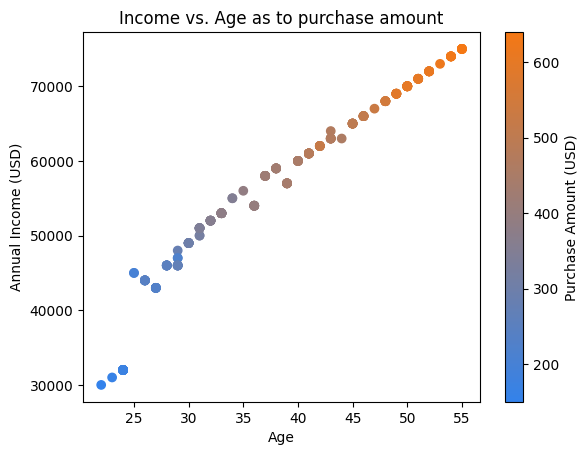

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load data from CSV
data = np.genfromtxt(path, names=True, delimiter=',', dtype=None, encoding=None)

# Extract columns
age = data['age']
annual_income = data["annual_income"]
purchase_amount = data["purchase_amount"]

# Define colormap from blue (low purchase) to orange (high purchase)
c1 = (0.20, 0.51, 0.92)  # Blue
c2 = (0.96, 0.47, 0.08)  # Orange
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", [c1, c2])

# Normalize purchase amounts for color mapping
norm = mcolors.Normalize(vmin=min(purchase_amount), vmax=max(purchase_amount))

# Create scatter plot
plt.scatter(age, annual_income, c=purchase_amount, cmap=cmap, norm=norm)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Annual Income (USD)")
plt.title("Income vs. Age as to purchase amount")

# Add color bar to show the meaning of the colors
cbar = plt.colorbar()
cbar.set_label("Purchase Amount (USD)")

# Show plot
plt.show()


**Heatmap**

Text(0.5, 1.0, 'Average Purchase Amount by Region and Age Group')

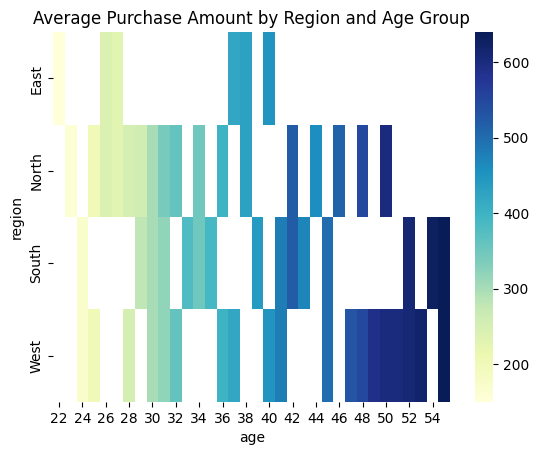

In [ ]:
# Assuming age bins (20s, 30s, etc.) and regions are relevant categories
import seaborn as sns
import pandas as pd

# Create a DataFrame from the data for easier manipulation
df = pd.DataFrame(data)

# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='region', columns='age', values='purchase_amount', aggfunc='mean')

# Create heatmap
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title("Average Purchase Amount by Region and Age Group")


However plotting the loyalty score would be a better choice

<ipython-input-21-6c9fca05d00d>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='region', columns='age_group', values='loyalty_score', aggfunc='mean')


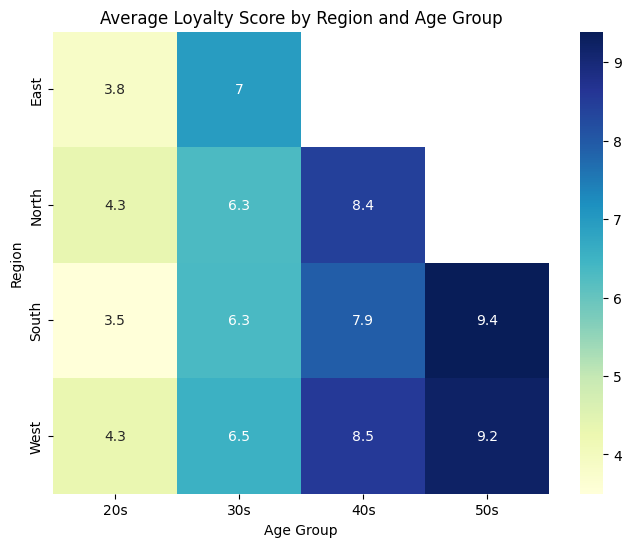

In [ ]:

# Create DataFrame from the data
df = pd.DataFrame(data)

# Create age bins (group ages by decades, e.g., 20s, 30s, etc.)
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60], labels=["20s", "30s", "40s", "50s"])

# Pivot table to calculate average loyalty score by region and age group
heatmap_data = df.pivot_table(index='region', columns='age_group', values='loyalty_score', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True)
plt.title("Average Loyalty Score by Region and Age Group")
plt.ylabel("Region")
plt.xlabel("Age Group")
plt.show()


**Interactive Plot**

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(data)

custom_labels = {
    'age': 'User Age',
    'annual_income': 'Annual Income (USD)',
    'purchase_frequency': 'Purchase Frequency (Times)',
    'purchase_amount': 'Purchase Amount (USD)',
    'user_id': 'User ID',
    'loyalty_score': 'Loyalty Score (scale 1-10)',
    'region': 'Region'
}

fig = px.scatter(df, x='age', y='annual_income',
                 size='purchase_frequency', color='purchase_amount',
                 hover_data={'user_id': True, 'loyalty_score': True, 'region': True},  # Ensure they appear on hover
                 color_continuous_scale=px.colors.sequential.Viridis,
                 title="Income vs. Age with Purchase Amount",
                 labels=custom_labels)

fig.show()



**Facet Plot by Region**

To show differences in purchasing behavior across regions, create separate scatter plots for each region using a facet grid.

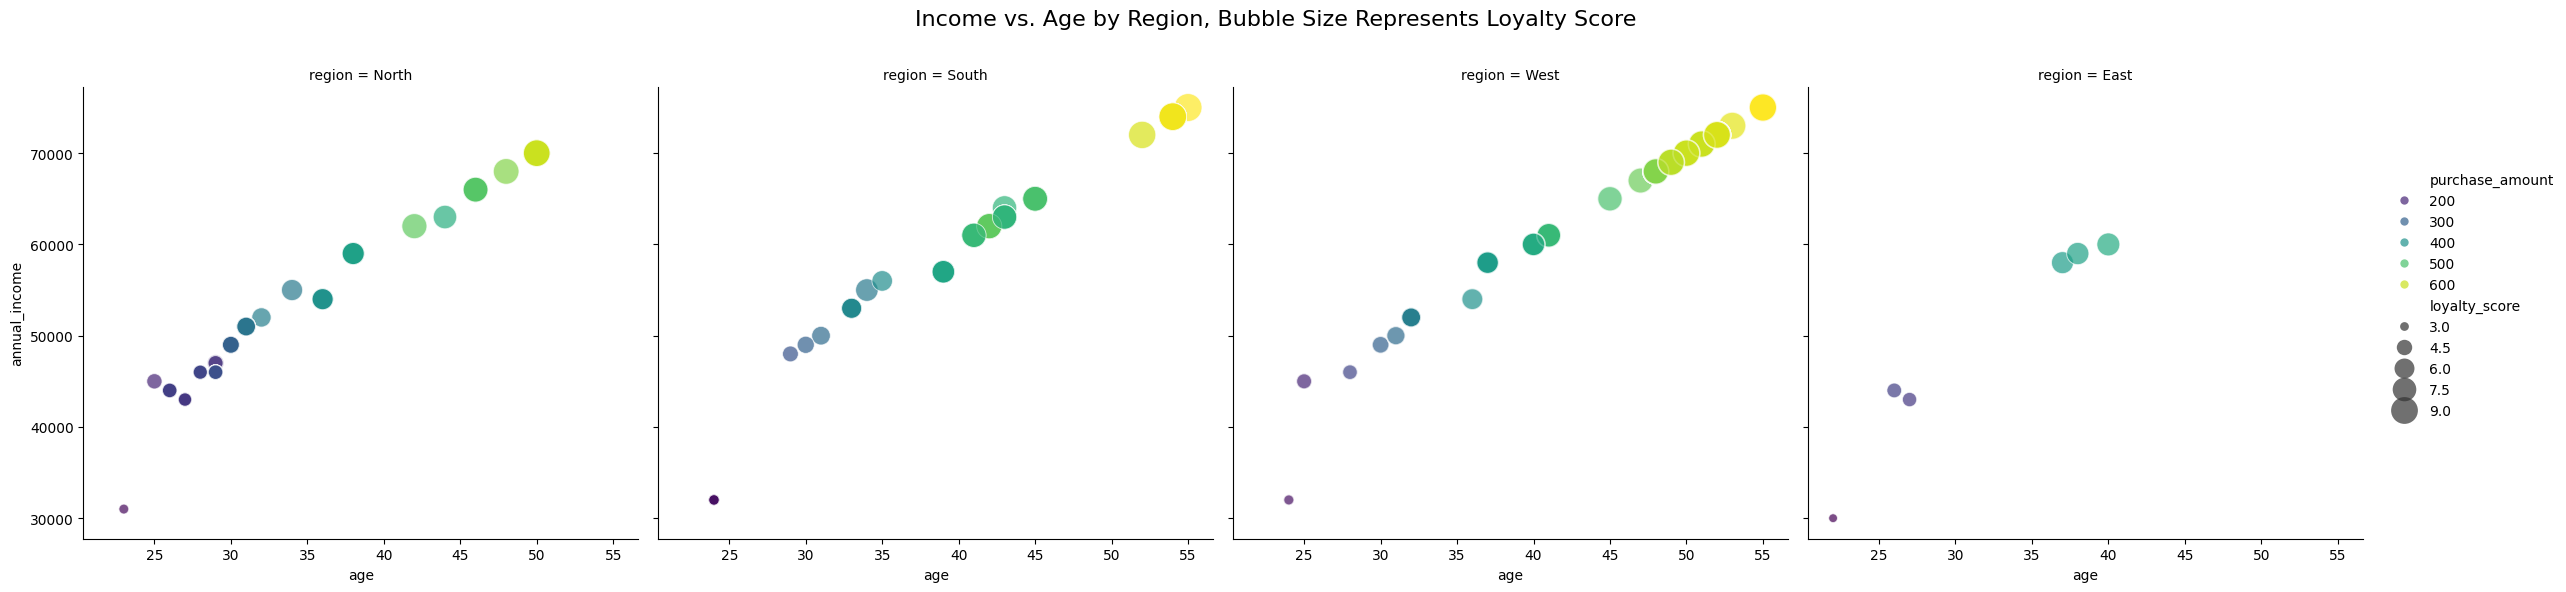

In [ ]:

df = pd.DataFrame(data)

# Facet grid scatter plots by region, using loyalty score for bubble size
sns.relplot(x="age", y="annual_income", hue="purchase_amount", size="loyalty_score",
            sizes=(40, 400), alpha=.7, palette="viridis", height=6, data=df, col="region")

plt.subplots_adjust(top=0.85)
plt.suptitle("Income vs. Age by Region, Bubble Size Represents Loyalty Score", size=16)
plt.show()


**Violin Plot**

Text(0, 0.5, 'Purchase Amount')

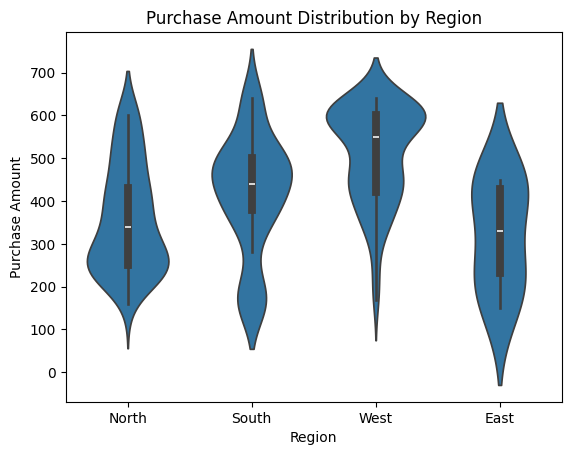

In [ ]:
# Violin plot showing distribution of purchase amount by region
sns.violinplot(x="region", y="purchase_amount", data=df)
plt.title("Purchase Amount Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Purchase Amount")


**Dual Axis plot**

This plot may be problematic because of the nature of the data

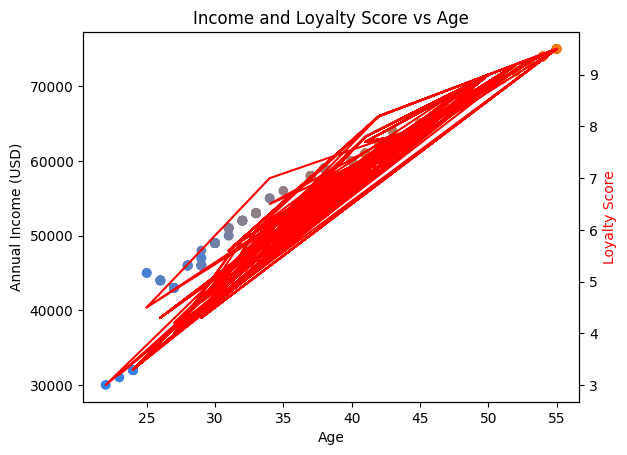

In [ ]:
fig, ax1 = plt.subplots()

# First plot: Age vs Annual Income
ax1.scatter(age, annual_income, c=purchase_amount, cmap=cmap, norm=norm)
ax1.set_xlabel("Age")
ax1.set_ylabel("Annual Income (USD)")

# Create a twin axis to plot loyalty score
ax2 = ax1.twinx()
ax2.plot(age, data['loyalty_score'], 'r-', label='Loyalty Score')
ax2.set_ylabel("Loyalty Score", color='r')

plt.title("Income and Loyalty Score vs Age")
plt.show()


**3D scatter plot**

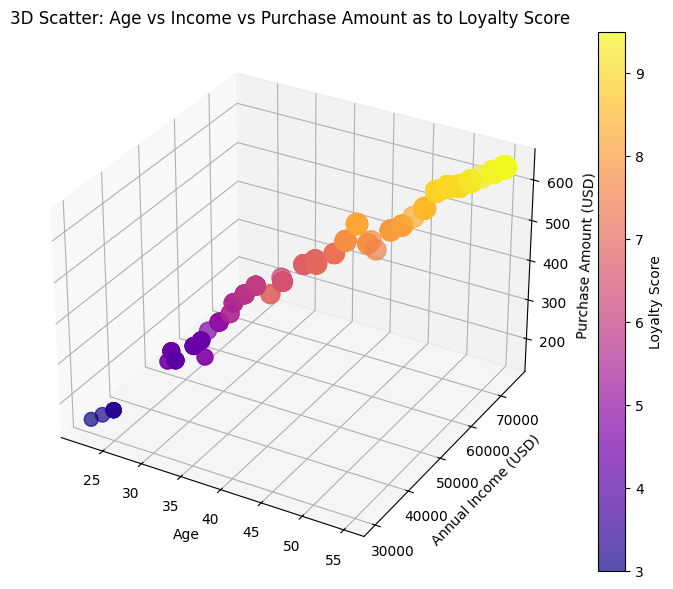

In [ ]:
# Create the 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Normalize loyalty score for color mapping
norm = mcolors.Normalize(vmin=min(df['loyalty_score']), vmax=max(df['loyalty_score']))
cmap = plt.get_cmap("plasma")

# Plot 3D scatter with loyalty score as the color and purchase amount as the bubble size
sc = ax.scatter(df['age'], df['annual_income'], df['purchase_amount'],
                c=df['loyalty_score'], cmap=cmap, s=df['purchase_frequency']*10, alpha=0.7)

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (USD)')
ax.set_zlabel('Purchase Amount (USD)')
plt.title("3D Scatter: Age vs Income vs Purchase Amount as to Loyalty Score")

# Add colorbar for loyalty score
cbar = plt.colorbar(sc)
cbar.set_label('Loyalty Score')

# Show the plot
plt.show()


# Phase 2 - Expanding the dataset


In [ ]:
# let's concat the two csv files together for a new data entry
import pandas as pd
df1 = pd.read_csv(path)
df2 = pd.read_csv(path2)
df2 = df2.rename(columns={
    "Customer ID": "customer_id",
    "Age": "age",
    "Gender": "gender",
    "Item Purchased": "item_purchased",
    "Category": "category",
    "Purchase Amount (USD)": "purchase_amount",
    "Location": "location",
    "Season": "season",
    "Review Rating": "review_rating",
    "Subscription Status": "subscription_status",
    "Promo Code Used": "promo_code_used",
    "Previous Purchases": "previous_purchases",
    "Payment Method": "payment_method",
    "Frequency of Purchases": "frequency_of_purchases",
    "Hour of Purchase": "hour_of_purchase",
    "Subscription Type": "subscription_type",
    "Discount Applied": "discount_applied",
    "Shipping Type": "shipping_type",
    "Color" : "color",
    "Size" : "size"
})
df2.head()

,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df1 = df1.drop(columns=["purchase_amount", "region"])
df1.head()

,user_id,age,annual_income,loyalty_score,purchase_frequency
0,1,25,45000,4.5,12
1,2,34,55000,7.0,18
2,3,45,65000,8.0,22
3,4,22,30000,3.0,10
4,5,29,47000,4.8,13


In [ ]:
merged_df = pd.merge(df1, df2, on="age", how="inner")
merged_df = merged_df.drop(columns=["user_id", "customer_id","purchase_frequency"])
# merged_df.to_csv("/content/drive/MyDrive/comp4462/project/curstomer_data_all.csv", index=False)
merged_df.head(150)

,age,annual_income,loyalty_score,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,25,45000,4.5,Male,Sunglasses,Accessories,36,Alabama,S,Gray,Spring,4.1,Yes,Next Day Air,Yes,Yes,44,Debit Card,Bi-Weekly
1,25,45000,4.5,Male,Scarf,Accessories,69,Ohio,L,Lavender,Fall,3.7,Yes,Store Pickup,Yes,Yes,19,PayPal,Fortnightly
2,25,45000,4.5,Male,Hat,Accessories,48,South Carolina,L,Violet,Summer,2.9,Yes,Express,Yes,Yes,29,Credit Card,Monthly
3,25,45000,4.5,Male,Shirt,Clothing,73,Connecticut,XL,Teal,Fall,4.1,Yes,Standard,Yes,Yes,50,Bank Transfer,Monthly
4,25,45000,4.5,Male,Hat,Accessories,46,Hawaii,M,Turquoise,Fall,3.4,Yes,Standard,Yes,Yes,30,Cash,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,34,55000,7.0,Female,Boots,Footwear,56,South Carolina,S,White,Summer,4.0,No,Free Shipping,No,No,38,PayPal,Bi-Weekly
146,34,55000,7.0,Female,Scarf,Accessories,66,Arizona,L,Olive,Fall,4.8,No,Standard,No,No,19,Credit Card,Every 3 Months
147,34,55000,7.0,Female,T-shirt,Clothing,47,North Carolina,M,Indigo,Summer,3.0,No,Next Day Air,No,No,3,PayPal,Monthly
148,34,55000,7.0,Female,Shirt,Clothing,44,Arkansas,L,Lavender,Summer,2.9,No,Next Day Air,No,No,28,Bank Transfer,Every 3 Months


In [ ]:
num_rows, num_columns = merged_df.shape
print(f"Number of rows: {num_rows}, Number of columns: {num_columns}")

Number of rows: 19273, Number of columns: 19


## Separating the data into states


In [ ]:
location_dfs = {location: merged_df[merged_df['location'] == location] for location in merged_df['location'].unique()}
location_dfs['New Jersey'].head(100)

,age,annual_income,loyalty_score,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
97,34,55000,7.0,Male,Sneakers,Footwear,45,New Jersey,M,Violet,Spring,4.2,Yes,Next Day Air,Yes,Yes,45,Venmo,Weekly
121,34,55000,7.0,Male,Blouse,Clothing,33,New Jersey,L,Yellow,Fall,3.1,No,2-Day Shipping,No,No,8,Debit Card,Monthly
141,34,55000,7.0,Female,Backpack,Accessories,54,New Jersey,M,Gray,Winter,3.8,No,Express,No,No,1,Debit Card,Bi-Weekly
284,22,30000,3.0,Female,Socks,Clothing,29,New Jersey,L,Indigo,Fall,3.0,No,Next Day Air,No,No,13,PayPal,Every 3 Months
319,29,47000,4.8,Male,Belt,Accessories,81,New Jersey,M,Olive,Spring,4.5,No,Store Pickup,Yes,Yes,8,Venmo,Bi-Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726,41,61000,7.8,Male,Belt,Accessories,92,New Jersey,XL,Cyan,Fall,2.9,No,Free Shipping,No,No,35,Debit Card,Weekly
5951,24,32000,3.3,Male,Belt,Accessories,42,New Jersey,M,Charcoal,Summer,3.9,No,Free Shipping,No,No,11,Debit Card,Quarterly
5973,24,32000,3.3,Female,Hoodie,Clothing,51,New Jersey,M,Gray,Summer,2.7,No,Next Day Air,No,No,26,Bank Transfer,Fortnightly
6072,26,44000,4.3,Male,Sunglasses,Accessories,99,New Jersey,M,Turquoise,Winter,3.6,Yes,Free Shipping,Yes,Yes,9,PayPal,Every 3 Months


In [ ]:
# get the female and male data
location_dfs['New Jersey'].groupby('gender').size()

,0
gender,
Female,75
Male,214


## Understanding the purchase total by state


In [ ]:
# Group by location and sum the purchase_amount for each state
state_purchase_sums = merged_df.groupby('location')['purchase_amount'].sum()

# Display the result
print(state_purchase_sums)

location
Alabama           [Every 3 Months, Annually, Monthly, Quarterly,...
Alaska            [Weekly, Fortnightly, Every 3 Months, Quarterl...
Arizona           [Every 3 Months, Monthly, Bi-Weekly, Annually,...
Arkansas          [Bi-Weekly, Quarterly, Fortnightly, Annually, ...
California        [Weekly, Fortnightly, Annually, Every 3 Months...
Colorado          [Every 3 Months, Fortnightly, Quarterly, Month...
Connecticut       [Fortnightly, Quarterly, Bi-Weekly, Monthly, W...
Delaware          [Every 3 Months, Annually, Fortnightly, Quarte...
Florida           [Weekly, Quarterly, Annually, Bi-Weekly, Fortn...
Georgia           [Every 3 Months, Bi-Weekly, Fortnightly, Quart...
Hawaii            [Every 3 Months, Weekly, Bi-Weekly, Annually, ...
Idaho             [Annually, Every 3 Months, Fortnightly, Monthl...
Illinois          [Bi-Weekly, Quarterly, Fortnightly, Monthly, E...
Indiana           [Annually, Every 3 Months, Weekly, Fortnightly...
Iowa              [Fortnightly, Quarter

In [ ]:
# Convert to DataFrame
state_purchase_sums_df = state_purchase_sums.reset_index()
state_purchase_sums_df.columns = ['location', 'total_purchase_amount']

# Display the DataFrame
print(state_purchase_sums_df)


          location  total_purchase_amount
0          Alabama                  22692
1           Alaska                  23046
2          Arizona                  21224
3         Arkansas                  16124
4       California                  25114
5         Colorado                  22894
6      Connecticut                  20529
7         Delaware                  28693
8          Florida                  18375
9          Georgia                  16034
10          Hawaii                  14714
11           Idaho                  27211
12        Illinois                  20416
13         Indiana                  18210
14            Iowa                  20620
15          Kansas                  17920
16        Kentucky                  23097
17       Louisiana                  15385
18           Maine                  19703
19        Maryland                  20589
20   Massachusetts                  21469
21        Michigan                  22761
22       Minnesota                

Get the unique types of purchase frequency


In [ ]:
state_purchase_frequency = merged_df['frequency_of_purchases'].unique()

# Display the result
print(state_purchase_frequency)

['Bi-Weekly' 'Fortnightly' 'Monthly' 'Annually' 'Weekly' 'Every 3 Months'
 'Quarterly']


## Possible Visualisations


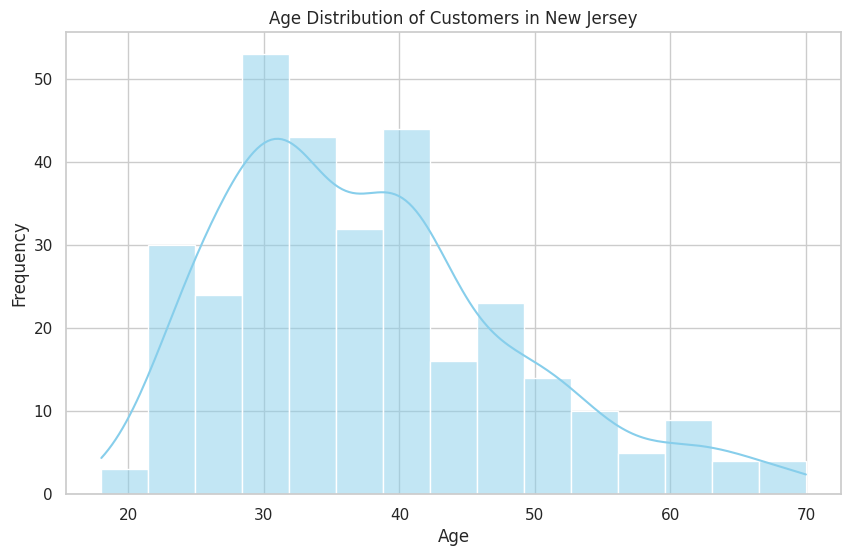

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style
sns.set(style="whitegrid")

# 1. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(location_dfs['New Jersey']['age'], kde=True, bins=15, color='skyblue')
plt.title("Age Distribution of Customers in New Jersey")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


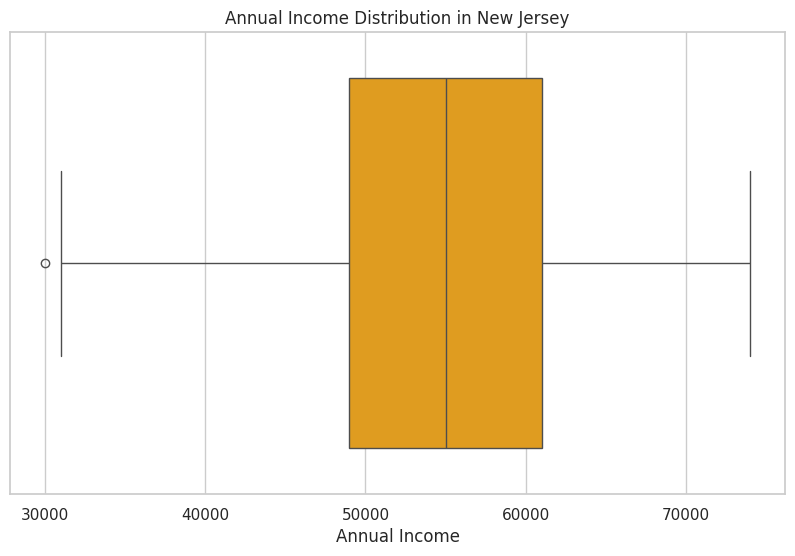

In [ ]:
# 2. Income Range - Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=location_dfs['New Jersey'], x='annual_income', color='orange')
plt.title("Annual Income Distribution in New Jersey")
plt.xlabel("Annual Income")
plt.show()

<ipython-input-31-262db487b452>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




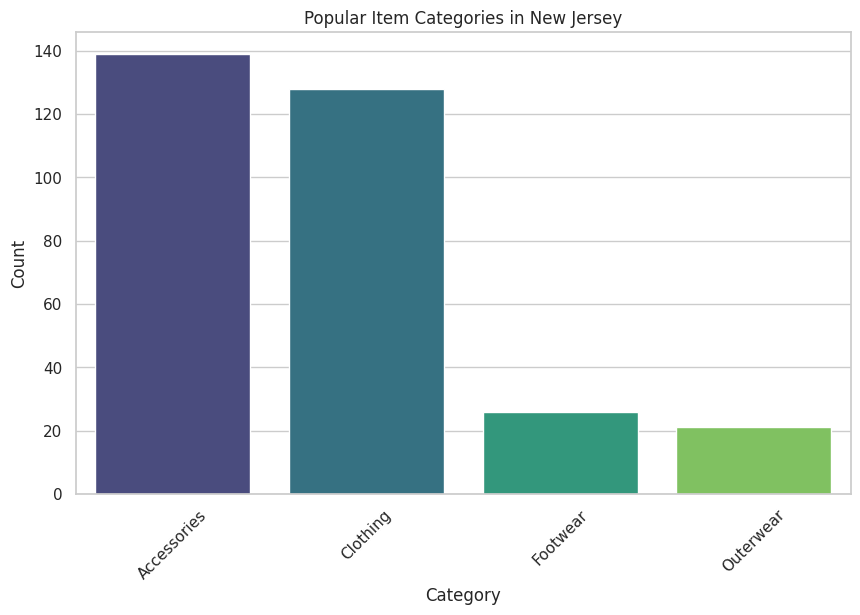

In [ ]:

# 3. Item Categories - Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=location_dfs['New Jersey'], x='category', palette="viridis", order=location_dfs['New Jersey']['category'].value_counts().index)
plt.title("Popular Item Categories in New Jersey")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

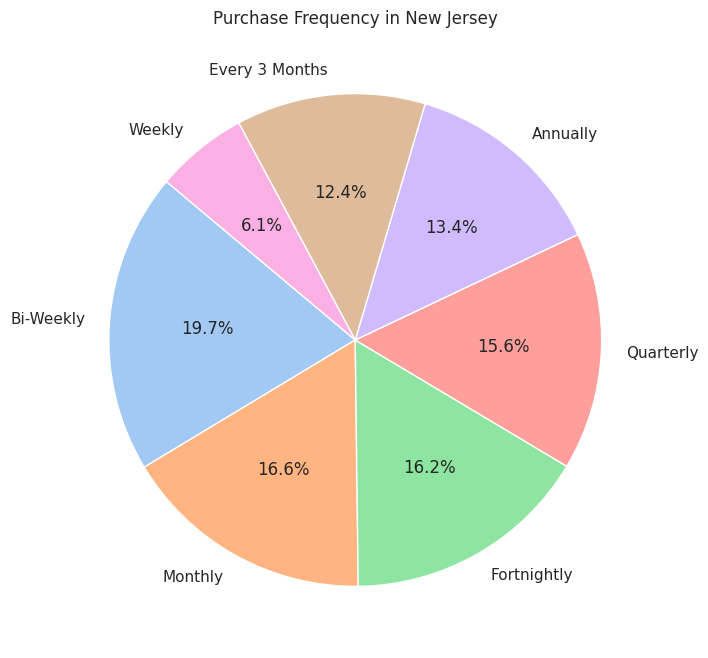

In [ ]:
# 4. Purchase Frequency
plt.figure(figsize=(8, 8))
location_dfs['New Jersey']['frequency_of_purchases'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Purchase Frequency in New Jersey")
plt.ylabel("")
plt.show()

<ipython-input-33-534cbff799b2>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




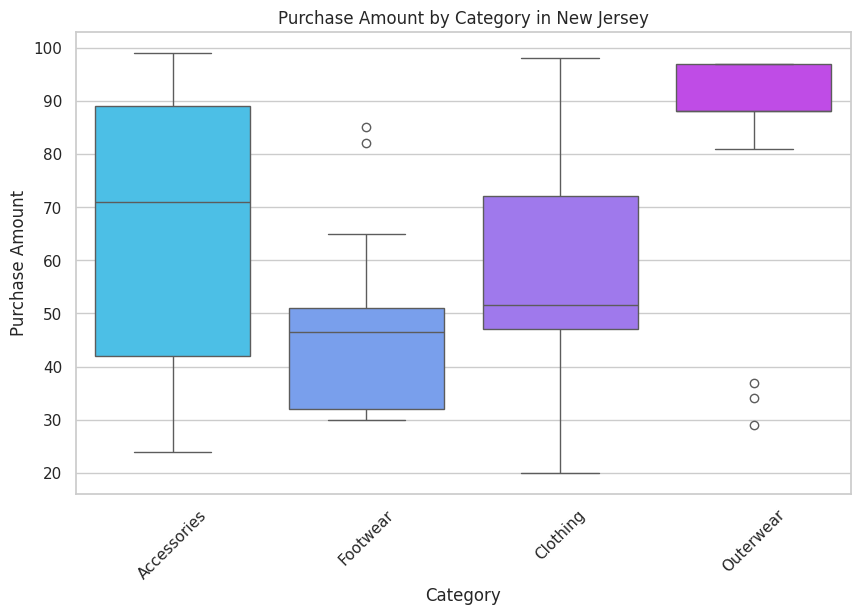

In [ ]:
# 5. Purchase Amount by Category - Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=location_dfs['New Jersey'], x='category', y='purchase_amount', palette="cool")
plt.title("Purchase Amount by Category in New Jersey")
plt.xlabel("Category")
plt.ylabel("Purchase Amount")
plt.xticks(rotation=45)
plt.show()

<ipython-input-34-207e165206ae>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-34-207e165206ae>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




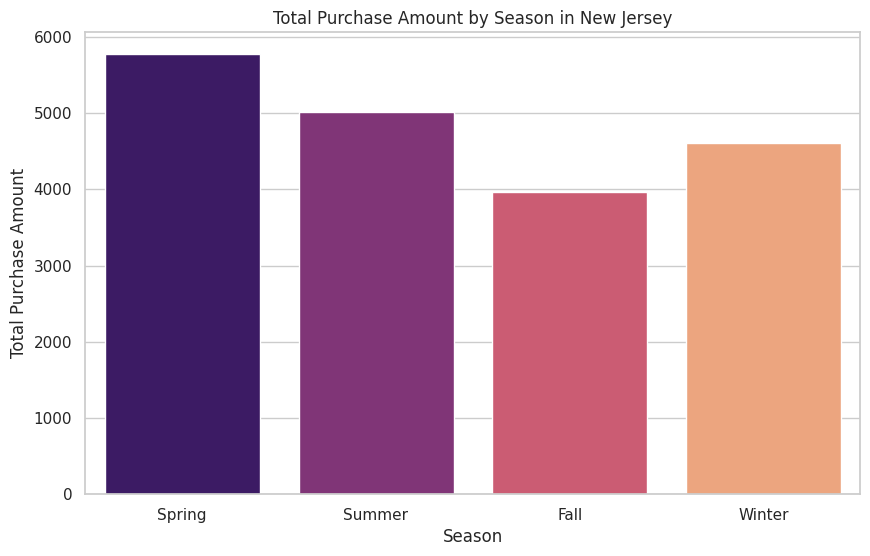

In [ ]:
# 6. Seasonal Trends - Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=location_dfs['New Jersey'], x='season', y='purchase_amount', estimator=sum, ci=None, palette="magma", order=["Spring", "Summer", "Fall", "Winter"])
plt.title("Total Purchase Amount by Season in New Jersey")
plt.xlabel("Season")
plt.ylabel("Total Purchase Amount")
plt.show()

In [ ]:
# Create a color dictionary to map each color name to its actual color
color_map = {
    'Cyan': '#00FFFF',
    'Gold': '#FFD700',
    'Purple': '#800080',
    'Silver': '#C0C0C0',
    'Beige': '#F5F5DC',
    'White': '#FFFFFF',
    'Charcoal': '#36454F',
    'Yellow': '#FFFF00',
    'Blue': '#0000FF',
    'Pink': '#FFC0CB',
    'Olive': '#808000',
    'Indigo': '#4B0082',
    'Brown': '#A52A2A',
    'Peach': '#FFE5B4',
    'Red': '#FF0000',
    'Violet': '#EE82EE',
    'Maroon': '#800000',
    'Red': '#FF0000',
    'Tomato': '#FF6347',
    'Crimson': '#DC143C',
    'OrangeRed': '#FF4500',
    'Coral': '#FF7F50',
    'DarkOrange': '#FF8C00',
    'GoldenRod': '#DAA520',
    'Yellow': '#FFFF00',
    'LemonChiffon': '#FFFACD',
    'Khaki': '#F0E68C',
    'PaleGoldenRod': '#EEE8AA',
    'Olive': '#808000',
    'Lime': '#00FF00',
    'LimeGreen': '#32CD32',
    'GreenYellow': '#ADFF2F',
    'Chartreuse': '#7FFF00',
    'SpringGreen': '#00FF7F',
    'MediumSeaGreen': '#3CB371',
    'SeaGreen': '#2E8B57',
    'ForestGreen': '#228B22',
    'Green': '#008000',
    'DarkGreen': '#006400',
    'Teal': '#008080',
    'Aqua': '#00FFFF',
    'Turquoise': '#40E0D0',
    'SkyBlue': '#87CEEB',
    'DodgerBlue': '#1E90FF',
    'Blue': '#0000FF',
    'RoyalBlue': '#4169E1',
    'MediumSlateBlue': '#7B68EE',
    'SlateBlue': '#6A5ACD',
    'DarkSlateBlue': '#483D8B',
    'Indigo': '#4B0082',
    'DarkMagenta': '#8B008B',
    'Magenta': '#FF00FF',
    'MediumOrchid': '#BA55D3',
    'Orchid': '#DA70D6',
    'Plum': '#DDA0DD',
    'Thistle': '#D8BFD8',
    'Lavender': '#E6E6FA',
    'White': '#FFFFFF',
    'LightGray': '#D3D3D3',
    'Silver': '#C0C0C0',
    'DarkGray': '#A9A9A9',
    'Gray': '#808080',
    'DimGray': '#696969',
    'Black': '#000000',
    'SlateGray': '#708090',
    'DarkSlateGray': '#2F4F4F'
}

# Get the ordered list of color names from the DataFrame
ordered_colors = location_dfs['New Jersey']['color'].value_counts().index
# print(ordered_colors)
# Generate the corresponding color list from the color_map
color_palette = [color_map[color] for color in ordered_colors]

# Plot with the custom color palette
plt.figure(figsize=(10, 6))
sns.countplot(
    data=location_dfs['New Jersey'],
    x='color',
    palette=color_palette,
    order=ordered_colors
)
plt.title("Color Preferences of Purchased Items in New Jersey")
plt.xlabel("Color")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


NameError: name 'plt' is not defined

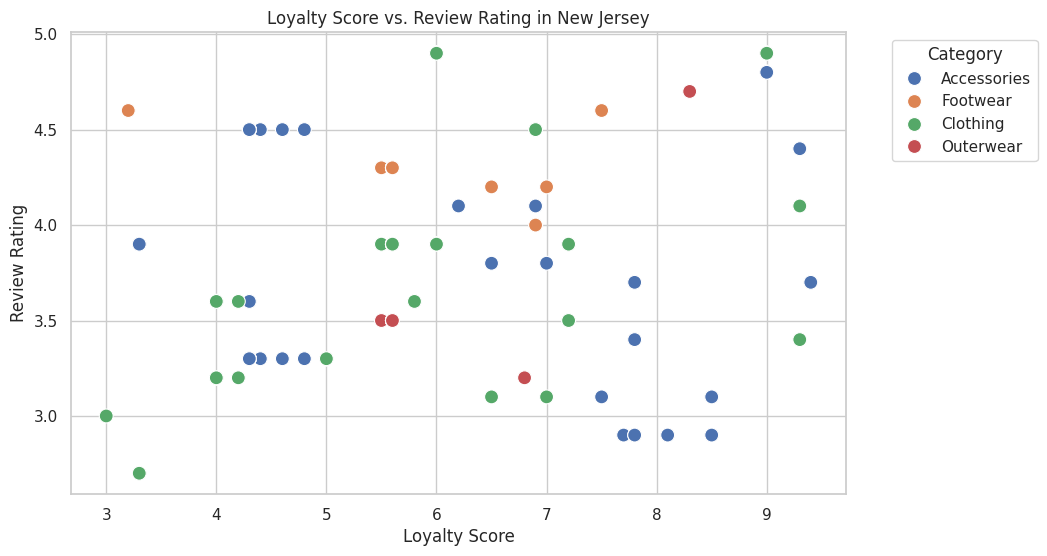

In [ ]:
# 8. Loyalty Score vs. Review Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=location_dfs['New Jersey'], x='loyalty_score', y='review_rating', hue='category', palette="deep", s=100)
plt.title("Loyalty Score vs. Review Rating in New Jersey")
plt.xlabel("Loyalty Score")
plt.ylabel("Review Rating")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
color_summary = (
    merged_df.groupby('item_purchased')['color']
    .agg(color_list=lambda x: list(set(x)), color_list_length=lambda x: len(set(x)))
    .reset_index()
)
print(color_summary)

   item_purchased                                         color_list  \
0        Backpack  [Purple, Black, Indigo, Gold, Violet, Peach, B...   
1            Belt  [Purple, Black, Indigo, Gold, Peach, Beige, Si...   
2          Blouse  [Purple, Black, Indigo, Gold, Violet, Peach, B...   
3           Boots  [Purple, Black, Indigo, Gold, Violet, Peach, B...   
4            Coat  [Purple, Black, Indigo, Gold, Violet, Peach, B...   
5           Dress  [Purple, Black, Indigo, Gold, Violet, Peach, B...   
6          Gloves  [Purple, Black, Indigo, Gold, Violet, Peach, B...   
7         Handbag  [Purple, Black, Indigo, Gold, Violet, Peach, B...   
8             Hat  [Purple, Black, Indigo, Gold, Violet, Peach, B...   
9          Hoodie  [Purple, Black, Indigo, Gold, Violet, Peach, B...   
10         Jacket  [Purple, Black, Indigo, Gold, Violet, Peach, B...   
11          Jeans  [Purple, Black, Indigo, Gold, Violet, Peach, B...   
12        Jewelry  [Purple, Black, Indigo, Gold, Violet, Peach, 

In [ ]:
# Filter for male gender
male_df = merged_df[merged_df['gender'] == 'Male']

bins = [20, 30, 40, 50, 60]
labels = ['20-30', '30-40', '40-50', '50-60']

# Create the age_group column for the male DataFrame
male_df['age_group'] = pd.cut(male_df['age'], bins=bins, labels=labels, right=False)

# Group by age_group
age_groups = male_df.groupby('age_group')

top_colors_by_age_group = {}
average_purchase_by_age_group = {}

# Calculate top color and average amount purchased for each age group
for age_group, group_data in age_groups:
    # Top color
    top_color = group_data['color'].value_counts().idxmax()
    top_colors_by_age_group[age_group] = top_color

    # Average amount purchased
    average_purchase = group_data['purchase_amount'].mean()
    average_purchase_by_age_group[age_group] = average_purchase

# Display results
for age_group in labels:
    print(f"Age group {age_group}:")
    if age_group in top_colors_by_age_group:
        print(f"  Top color: {top_colors_by_age_group[age_group]}")
        print(f"  Average amount purchased: {average_purchase_by_age_group[age_group]:.2f}")
    else:
        print("  No data available.")


Age group 20-30:
  Top color: Green
  Average amount purchased: 59.39
Age group 30-40:
  Top color: Olive
  Average amount purchased: 60.30
Age group 40-50:
  Top color: Teal
  Average amount purchased: 58.81
Age group 50-60:
  Top color: Violet
  Average amount purchased: 60.40


<ipython-input-23-e357be282279>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df['age_group'] = pd.cut(male_df['age'], bins=bins, labels=labels, right=False)
<ipython-input-23-e357be282279>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = male_df.groupby('age_group')


# Phase 3 - PCA (Principal Component Analysis)


## Preprocessing

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(merged_df.describe())

                age  annual_income  loyalty_score  purchase_amount  \
count  17887.000000   17887.000000   17887.000000     17887.000000   
mean      38.867725   57669.871974       6.836859        60.078940   
std        9.324325   11275.730559       1.893330        23.621433   
min       22.000000   30000.000000       3.000000        20.000000   
25%       31.000000   50000.000000       5.500000        39.000000   
50%       39.000000   59000.000000       7.000000        60.000000   
75%       48.000000   68000.000000       8.500000        80.000000   
max       55.000000   75000.000000       9.500000       100.000000   

       review_rating  previous_purchases  
count   17887.000000        17887.000000  
mean        3.743255           25.087326  
std         0.716728           14.660098  
min         2.500000            1.000000  
25%         3.100000           12.000000  
50%         3.800000           25.000000  
75%         4.300000           38.000000  
max         5.000000     

In [ ]:
merged_df.isna().sum()

,0
age,0
annual_income,0
loyalty_score,0
gender,0
item_purchased,0
category,0
purchase_amount,0
location,0
size,0
color,0


In [ ]:
merged_df

,age,annual_income,loyalty_score,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,25,45000,4.5,Male,Sunglasses,Accessories,36,Alabama,S,Gray,Spring,4.1,Yes,Next Day Air,Yes,Yes,44,Debit Card,Bi-Weekly
1,25,45000,4.5,Male,Scarf,Accessories,69,Ohio,L,Lavender,Fall,3.7,Yes,Store Pickup,Yes,Yes,19,PayPal,Fortnightly
2,25,45000,4.5,Male,Hat,Accessories,48,South Carolina,L,Violet,Summer,2.9,Yes,Express,Yes,Yes,29,Credit Card,Monthly
3,25,45000,4.5,Male,Shirt,Clothing,73,Connecticut,XL,Teal,Fall,4.1,Yes,Standard,Yes,Yes,50,Bank Transfer,Monthly
4,25,45000,4.5,Male,Hat,Accessories,46,Hawaii,M,Turquoise,Fall,3.4,Yes,Standard,Yes,Yes,30,Cash,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17882,31,51000,5.6,Female,Belt,Accessories,73,New Hampshire,M,Blue,Spring,4.8,No,Next Day Air,No,No,38,Cash,Every 3 Months
17883,31,51000,5.6,Female,Skirt,Clothing,67,New York,M,White,Winter,5.0,No,Free Shipping,No,No,45,Cash,Bi-Weekly
17884,31,51000,5.6,Female,Shoes,Footwear,50,Vermont,S,White,Winter,3.8,No,Free Shipping,No,No,4,PayPal,Every 3 Months
17885,31,51000,5.6,Female,Socks,Clothing,43,Utah,M,Silver,Fall,3.6,No,Free Shipping,No,No,27,PayPal,Quarterly


1386 rows of missing data in three columns: annual_income, loyalty_score, purchase_frequency -> since those three columns are from the first dataset, which had significantly less rows, compared to the second one and when merging the two datasets created a lot of NA's. . Imputing these missing values could introduce bias and distort the clustering results, leading to skewed or less meaningful clusters.   
Hence, I will continue on with just using the second dataset.


### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Frequency encoding for high-cardinality columns
high_cardinality_columns = ['item_purchased', 'location']
for col in high_cardinality_columns:
    freq_encoding = merged_df[col].value_counts().to_dict()
    merged_df[col] = merged_df[col].map(freq_encoding)

# Label encoding for low-cardinality columns
categorical_columns = [
    'gender', 'category', 'size', 'color', 'season',
    'subscription_status', 'shipping_type', 'discount_applied',
    'promo_code_used', 'payment_method', 'frequency_of_purchases'
]
le = LabelEncoder()
for col in categorical_columns:
    merged_df[col] = le.fit_transform(merged_df[col])

# Define features to scale
features_to_scale = merged_df.columns.tolist()  # All columns are now numeric

# Apply MinMaxScaler or StandardScaler to the entire dataset
scaler = MinMaxScaler()  # Or StandardScaler for mean=0, std=1 scaling
merged_df[features_to_scale] = scaler.fit_transform(merged_df[features_to_scale])

# Save preprocessed data
merged_df.to_csv("merged_df.csv", index=False)



In [ ]:
# Dictionary storing label mappings for categorical columns
encoded_classes = {
    'gender': ['Female', 'Male'],
    'item_purchased': [
        'Backpack', 'Belt', 'Blouse', 'Boots', 'Coat', 'Dress', 'Gloves',
        'Handbag', 'Hat', 'Hoodie', 'Jacket', 'Jeans', 'Jewelry', 'Pants',
        'Sandals', 'Scarf', 'Shirt', 'Shoes', 'Shorts', 'Skirt', 'Sneakers',
        'Socks', 'Sunglasses', 'Sweater', 'T-shirt'
    ],
    'category': ['Accessories', 'Clothing', 'Footwear', 'Outerwear'],
    'location': [
        'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
        'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
        'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
        'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
        'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
        'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
        'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
        'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
        'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
        'West Virginia', 'Wisconsin', 'Wyoming'
    ],
    'size': ['S', 'M', 'L', 'XL'],
    'color': [
        'Beige', 'Black', 'Blue', 'Brown', 'Charcoal', 'Cyan', 'Gold', 'Gray',
        'Green', 'Indigo', 'Lavender', 'Magenta', 'Maroon', 'Olive', 'Orange',
        'Peach', 'Pink', 'Purple', 'Red', 'Silver', 'Teal', 'Turquoise',
        'Violet', 'White', 'Yellow'
    ],
    'season': ['Fall', 'Spring', 'Summer', 'Winter'],
    'subscription_status': ['No', 'Yes'],
    'shipping_type': [
        '2-Day Shipping', 'Express', 'Free Shipping', 'Next Day Air',
        'Standard', 'Store Pickup'
    ],
    'discount_applied': ['No', 'Yes'],
    'promo_code_used': ['No', 'Yes'],
    'payment_method': [
        'Bank Transfer', 'Cash', 'Credit Card', 'Debit Card', 'PayPal', 'Venmo'
    ],
    'frequency_of_purchases': [
        'Annually', 'Bi-Weekly', 'Every 3 Months', 'Fortnightly', 'Monthly',
        'Quarterly', 'Weekly'
    ]
}

# Printing the mappings for each category
for column, classes in encoded_classes.items():
    print(f"Encoded categories for {column}:")
    for index, label in enumerate(classes):
        print(f"  {index} -> {label}")
    print()  # Adds a newline for better readability between categories



Encoded categories for gender:
  0 -> Female
  1 -> Male

Encoded categories for item_purchased:
  0 -> Backpack
  1 -> Belt
  2 -> Blouse
  3 -> Boots
  4 -> Coat
  5 -> Dress
  6 -> Gloves
  7 -> Handbag
  8 -> Hat
  9 -> Hoodie
  10 -> Jacket
  11 -> Jeans
  12 -> Jewelry
  13 -> Pants
  14 -> Sandals
  15 -> Scarf
  16 -> Shirt
  17 -> Shoes
  18 -> Shorts
  19 -> Skirt
  20 -> Sneakers
  21 -> Socks
  22 -> Sunglasses
  23 -> Sweater
  24 -> T-shirt

Encoded categories for category:
  0 -> Accessories
  1 -> Clothing
  2 -> Footwear
  3 -> Outerwear

Encoded categories for location:
  0 -> Alabama
  1 -> Alaska
  2 -> Arizona
  3 -> Arkansas
  4 -> California
  5 -> Colorado
  6 -> Connecticut
  7 -> Delaware
  8 -> Florida
  9 -> Georgia
  10 -> Hawaii
  11 -> Idaho
  12 -> Illinois
  13 -> Indiana
  14 -> Iowa
  15 -> Kansas
  16 -> Kentucky
  17 -> Louisiana
  18 -> Maine
  19 -> Maryland
  20 -> Massachusetts
  21 -> Michigan
  22 -> Minnesota
  23 -> Mississippi
  24 -> Misso

## Modelling

In [ ]:
# Select relevant columns
features_to_use = [
    'age', 'purchase_amount', 'review_rating', 'previous_purchases',
    'gender', 'item_purchased', 'category', 'location', 'size', 'color',
    'season', 'subscription_status', 'shipping_type', 'discount_applied',
    'promo_code_used', 'payment_method', 'frequency_of_purchases'
]

# Defining X
X = merged_df[features_to_use]


### Best inertia for KMeans
KElbowVisualizer finds the best number of clusters using the within-cluster sum of the squares WCSS, also called inertia or distortion. It plots the relationship of inertia and the number of clusters and uses the elbow rule to get the best number of clusters, so we'll check it to verify the most suitable number, four, which we guessed previously.

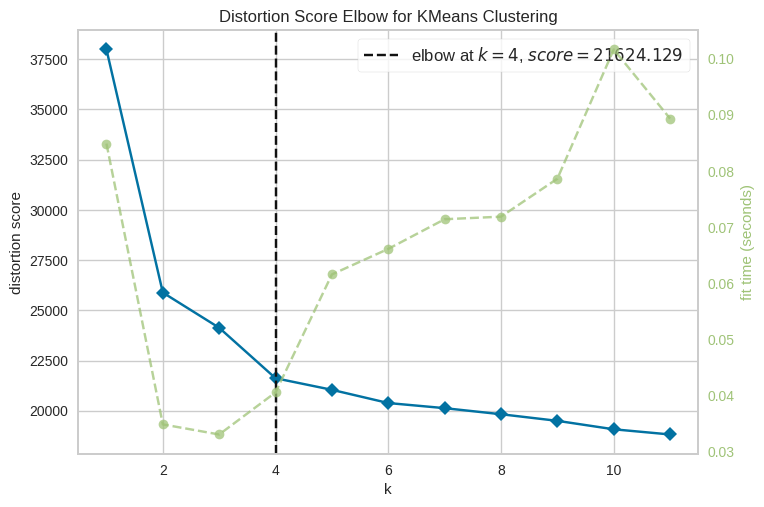

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
kmeans_tune = KMeans(random_state=42,n_init = 2,max_iter=10)
visualizer = KElbowVisualizer(kmeans_tune, k=(1,12),metric="distortion")
visualizer.fit(X)
visualizer.show()

from the elbow graph, we can cleaerly see that the best number of clusters is 4

In [ ]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)  # Choose the number of clusters
clusters = kmeans.fit_predict(X)

# Add cluster labels back to the DataFrame
merged_df['cluster'] = clusters

# Save the clustered dataset
merged_df.to_csv('clustered_dataset.csv', index=False)



In [ ]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

## Visualizing the clusters


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

centers_pca = pca.transform(centers)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


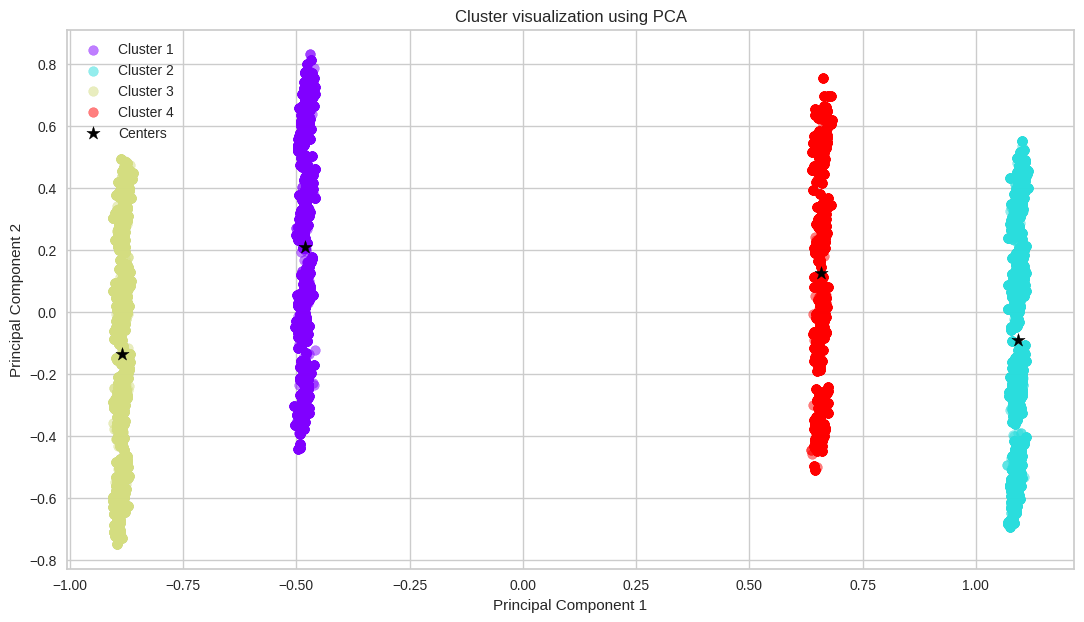

In [ ]:
n_clusters = len(np.unique(labels))
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))

plt.figure(figsize=(13, 7))


for i, color in zip(range(n_clusters), colors):
    cluster_indices = np.where(labels == i)
    plt.scatter(X_pca[cluster_indices, 0], X_pca[cluster_indices, 1], color=color, alpha=0.5, label=f'Cluster {i+1}')


plt.scatter(centers_pca[:, 0], centers_pca[:, 1], marker='*', s=100, c='black', label='Centers')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster visualization using PCA')
plt.legend()
plt.show()

In [ ]:
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.33551973 0.0684889 ]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


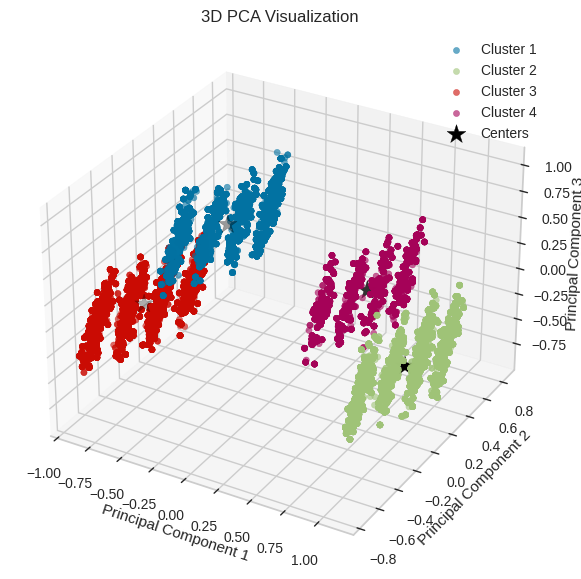

Explained Variance Ratio (3 Components): [0.33551973 0.0684889  0.05993476]


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA with 3 components for 3D visualization
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X)  # Use the scaled dataset (X)

# Transform cluster centers if they exist
centers_pca_3d = pca_3d.transform(centers) if 'centers' in locals() else None

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot clusters
for i in range(n_clusters):
    cluster_indices = np.where(labels == i)
    ax.scatter(
        X_pca_3d[cluster_indices, 0], X_pca_3d[cluster_indices, 1], X_pca_3d[cluster_indices, 2],
        label=f'Cluster {i+1}', alpha=0.6
    )

# Plot cluster centers
if centers_pca_3d is not None:
    ax.scatter(
        centers_pca_3d[:, 0], centers_pca_3d[:, 1], centers_pca_3d[:, 2],
        marker='*', s=200, c='black', label='Centers'
    )

# Add labels and title
ax.set_title('3D PCA Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

# Print explained variance for 3D PCA
print("Explained Variance Ratio (3 Components):", pca_3d.explained_variance_ratio_)


In [ ]:
X_pca_3d

array([[ 1.08995173,  0.3697153 , -0.39948537],
       [ 1.08179321,  0.42222488, -0.32266576],
       [ 1.09507397, -0.2207224 , -0.06960964],
       ...,
       [-0.87438529, -0.16496666, -0.38755391],
       [-0.88076819,  0.06566166, -0.33983432],
       [-0.8740243 , -0.18307061, -0.31299745]])

### Downloading the file as json


In [ ]:
import json
# Create a dictionary to store the clusters and points
clusters_data = {"clusters": []}

# Iterate through each cluster and store points
for i in range(n_clusters):
    cluster_indices = np.where(labels == i)
    cluster_points = X_pca_3d[cluster_indices].tolist()  # Convert to list for JSON serialization

    clusters_data["clusters"].append({
        "cluster": i + 1,  # Cluster index (1-based)
        "points": cluster_points
    })

# Save to a JSON file
output_file = 'pca_3d_data.json'
with open(output_file, 'w') as f:
    json.dump(clusters_data, f, indent=4)

print(f"Cluster data has been saved to {output_file}")


Cluster data has been saved to pca_3d_data.json


## Explanation - cluster descriptions

In [ ]:
# Define aggregation function based on predefined categorical columns
cluster_summary_agg = merged_df.groupby('cluster').agg({
    column: (lambda x: x.mode()[0]) if column in categorical_columns else 'mean'
    for column in merged_df.columns if column != 'cluster'
})

# Save the cleaned cluster summary
cluster_summary_agg.to_csv("cluster_summary_agg.csv", index=True)
print("Cluster summary aggregated and saved to 'cluster_summary_agg.csv'.")

cluster_summary_agg


Cluster summary aggregated and saved to 'cluster_summary_agg.csv'.


,age,annual_income,loyalty_score,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
cluster,,,,,,,,,,,,,,,,,,,
0,0.503457,0.609113,0.586952,1.0,0.491870,0.333333,0.507932,0.498781,0.333333,0.333333,1.000000,0.516849,0.0,0.6,0.0,0.0,0.499117,0.8,0.333333
1,0.523176,0.623131,0.600067,1.0,0.461063,0.333333,0.498786,0.500368,0.333333,0.333333,0.666667,0.496216,1.0,1.0,1.0,1.0,0.511381,0.6,0.000000
2,0.512454,0.615668,0.589982,0.0,0.488296,0.333333,0.505090,0.491240,0.333333,0.666667,0.000000,0.492032,0.0,0.4,0.0,0.0,0.478018,0.8,0.166667
3,0.497880,0.606905,0.577659,1.0,0.499893,0.333333,0.484522,0.464299,0.333333,0.791667,1.000000,0.478338,0.0,0.6,1.0,1.0,0.470749,0.2,0.666667


In [ ]:
import pandas as pd
import numpy as np

# Load original preprocessed data
df2 = pd.read_csv("clustered_dataset.csv")

# Add cluster labels to the original DataFrame
df2['cluster'] = labels

# Save clustered dataset with PCA components
df2['PCA1'] = X_pca_3d[:, 0]
df2['PCA2'] = X_pca_3d[:, 1]
df2['PCA3'] = X_pca_3d[:, 2]

# Save the final dataset with PCA components and cluster assignments
df2.to_csv('clustered_data_with_pca.csv', index=False)

# Get original data points for each cluster
for cluster in range(n_clusters):
    print(f"\nCluster {cluster+1} Analysis")

    # Filter data points belonging to the current cluster
    cluster_data = df2[df2['cluster'] == cluster]

    # Print some samples from the cluster
    print(f"Sample Data Points from Cluster {cluster+1}:")
    print(cluster_data.head(5))  # Display the first 5 data points in this cluster

    # Statistical summary of numerical features for the current cluster
    print(f"\nStatistical Summary of Cluster {cluster+1}:")
    print(cluster_data.describe())

    # Mode of categorical features
    print(f"\nMode of Categorical Features for Cluster {cluster+1}:")
    print(cluster_data.mode().iloc[0])  # Mode for each feature in this cluster

# Save summaries to file if needed
df2.groupby('cluster').mean().to_csv("cluster_mean_summary.csv")




Cluster 1 Analysis
Sample Data Points from Cluster 1:
         age  annual_income  loyalty_score  gender  item_purchased  category  \
40  0.090909       0.333333       0.230769     1.0        1.000000  0.000000   
41  0.090909       0.333333       0.230769     1.0        0.205224  0.333333   
42  0.090909       0.333333       0.230769     1.0        0.205224  0.333333   
43  0.090909       0.333333       0.230769     1.0        0.417910  0.333333   
44  0.090909       0.333333       0.230769     1.0        0.671642  0.666667   

    purchase_amount  location      size     color  ...  shipping_type  \
40           0.2625     0.440  1.000000  0.875000  ...            0.8   
41           0.7625     0.616  0.000000  0.500000  ...            0.0   
42           0.8000     0.496  0.666667  0.000000  ...            0.2   
43           0.0875     0.632  0.000000  0.041667  ...            0.6   
44           0.3125     0.684  0.333333  0.375000  ...            0.0   

    discount_applied  pro

## Inverse the numerical features

In [ ]:
# Function to inverse transform Min-Max Scaling
def inverse_min_max_scaling(value, min_val, max_val):
    return value * (max_val - min_val) + min_val

original_data = pd.read_csv(path2)
original_data = original_data.rename(columns={
    "Customer ID": "customer_id",
    "Age": "age",
    "Gender": "gender",
    "Item Purchased": "item_purchased",
    "Category": "category",
    "Purchase Amount (USD)": "purchase_amount",
    "Location": "location",
    "Season": "season",
    "Review Rating": "review_rating",
    "Subscription Status": "subscription_status",
    "Promo Code Used": "promo_code_used",
    "Previous Purchases": "previous_purchases",
    "Payment Method": "payment_method",
    "Frequency of Purchases": "frequency_of_purchases",
    "Hour of Purchase": "hour_of_purchase",
    "Subscription Type": "subscription_type",
    "Discount Applied": "discount_applied",
    "Shipping Type": "shipping_type",
    "Color" : "color",
    "Size" : "size"
})

fields_to_compute = ['purchase_amount', 'age', 'review_rating', 'previous_purchases']
original_stats = {}

for field in fields_to_compute:
    min_val = original_data[field].min()
    max_val = original_data[field].max()
    original_stats[field] = {'min': min_val, 'max': max_val}

original_stats

{'purchase_amount': {'min': 20, 'max': 100},
 'age': {'min': 18, 'max': 70},
 'review_rating': {'min': 2.5, 'max': 5.0},
 'previous_purchases': {'min': 1, 'max': 50}}

## Decode the mean summary of clusters

In [ ]:
# now we reverse the encoding from the given summary for 4 clusters

cluster_summary = pd.read_csv('cluster_mean_summary.csv')

# Function to map encoded values back to original
def reverse_encoding(col, value):
    if col in encoded_classes:
        return encoded_classes[col][int(round(value))]
    else:
        return value  # For numeric columns, return the value directly

# Decode each column in the cluster summary with categorical values
decoded_cluster_summary = cluster_summary.copy()

columns_to_decode = [
    'gender', 'item_purchased', 'category', 'location', 'size', 'color',
    'season', 'subscription_status', 'shipping_type', 'discount_applied',
    'promo_code_used', 'payment_method', 'frequency_of_purchases'
]

for col in columns_to_decode:
    decoded_cluster_summary[col] = cluster_summary[col].apply(lambda x: reverse_encoding(col, x))


# Then decode the inverse transformation to the numerical columns
decoded_cluster_summary['age'] = cluster_summary['age'].apply(
    lambda x: inverse_min_max_scaling(x, original_stats['age']['min'], original_stats['age']['max'])
)

decoded_cluster_summary['purchase_amount'] = cluster_summary['purchase_amount'].apply(
    lambda x: inverse_min_max_scaling(x, original_stats['purchase_amount']['min'], original_stats['purchase_amount']['max'])
)

decoded_cluster_summary['review_rating'] = cluster_summary['review_rating'].apply(
    lambda x: inverse_min_max_scaling(x, original_stats['review_rating']['min'], original_stats['review_rating']['max'])
)

decoded_cluster_summary['previous_purchases'] = cluster_summary['previous_purchases'].apply(
    lambda x: inverse_min_max_scaling(x, original_stats['previous_purchases']['min'], original_stats['previous_purchases']['max'])
)

# Save decoded cluster summary to CSV
decoded_cluster_summary.to_csv('decoded_cluster_mean_summary.csv', index=False)

print(decoded_cluster_summary.head())

   cluster        age  annual_income  loyalty_score  gender item_purchased  \
0        0  44.179748       0.609113       0.586952    Male       Backpack   
1        1  45.205156       0.623131       0.600067    Male       Backpack   
2        2  44.647612       0.615668       0.589982  Female       Backpack   
3        3  43.889763       0.606905       0.577659    Male       Backpack   

      category  purchase_amount location size  ... subscription_status  \
0  Accessories        60.634563  Alabama    S  ...                  No   
1  Accessories        59.902844   Alaska    S  ...                 Yes   
2  Accessories        60.407197  Alabama    S  ...                  No   
3  Accessories        58.761723  Alabama    S  ...                  No   

    shipping_type  discount_applied promo_code_used previous_purchases  \
0         Express                No              No          25.456740   
1         Express               Yes             Yes          26.057662   
2  2-Day Shippin

## Analyzing cluster 0

In [ ]:
import pandas as pd

# Define age bins and labels
bins = [20, 30, 40, 50, 60]  # Age groups
labels = ['20-30', '30-40', '40-50', '50-60']

# Create the age_group column
merged_df['age_group'] = pd.cut(
    merged_df['age'], bins=bins, labels=labels, right=False
)

# Group by age_group and find top 5 colors for each
age_groups = merged_df.groupby('age_group')
top_colors_by_age_group = {}

for age_group, group_data in age_groups:
    top_colors = (
        group_data['color']
        .value_counts()
        .head(5)  # Get the top 5 colors
        .index.tolist()
    )
    top_colors_by_age_group[age_group] = top_colors

# Display the results
for age_group, top_colors in top_colors_by_age_group.items():
    print(f"Top 5 colors for age group {age_group}: {top_colors}")


Top 5 colors for age group 20-30: ['Green', 'Peach', 'Maroon', 'Magenta', 'Gray']
Top 5 colors for age group 30-40: ['Olive', 'Brown', 'Silver', 'Yellow', 'Orange']
Top 5 colors for age group 40-50: ['Cyan', 'Silver', 'Red', 'Orange', 'Pink']
Top 5 colors for age group 50-60: ['Pink', 'Gray', 'Peach', 'Black', 'Violet']


<ipython-input-19-62799992c9dc>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = merged_df.groupby('age_group')
